# LFV Higgs decays in the 2HDM with  SeeSaw type I

In [1]:
from sympy import init_printing,lambdify,Symbol, symbols, Matrix
init_printing()
import OneLoopLFVHD as lfvhd

In [2]:
from THDM_seesaw_FF import TrianglesOneFermion, TrianglesTwoFermion, Bubbles
from THDM_seesaw_FF import g, mW, mG, mHpm, mϕ, Uν, Uνc, mn, m, C, Cc, a,b,i
from THDM_seesaw_FF import j as jj
from THDM_seesaw_FF import ξlϕ, ξnϕ, ξlA, ξnA,α, β, Ξϕ, Kϕ, Qϕ,ρϕ, Δϕ,ηϕ, λ5

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from mpmath import *

In [5]:
mp.dps = 80; mp.pretty = True

In [6]:
import numpy as np

In [7]:
import subprocess as s

In [8]:
from multiprocessing import Pool
from time import time

In [9]:
def speedup_array(f,array,procs=4): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array)
    result = np.array(list(pool))
    return result

## Numeric implementation of form factors

**Neutrino benchmark** is given by 

In [10]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [11]:
m1 = mpf('1e-12')  #GeV 

#current values to Square mass differences
d21 = mpf(str(Nudata.squareDm21.central))*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mpf(str(Nudata.squareDm31.central))*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

## Setting 2HDM

In [12]:
from sympy import cos as cos_sp
from sympy import sin as sin_sp
from sympy import cot as cot_sp
from sympy import tan as tan_sp

In [13]:
typeI_ξh = {ξlφ:cos_sp(α)/sin_sp(β),ξnφ:cos_sp(α)/sin_sp(β),ξlA:-cot_sp(β),ξnA:cot_sp(β)}
typeI_ξH = {ξlφ:sin_sp(α)/sin_sp(β),ξnφ:sin_sp(α)/sin_sp(β),ξlA:-cot_sp(β),ξnA:cot_sp(β)}

typeII_ξh = {ξlφ:-sin_sp(α)/cos_sp(β),ξnφ:cos_sp(α)/sin_sp(β),ξlA:tan_sp(β),ξnA:cot_sp(β)}
typeII_ξH = {ξlφ:cos_sp(α)/cos_sp(β),ξnφ:sin_sp(α)/sin_sp(β),ξlA:tan_sp(β),ξnA:cot_sp(β)}

lepton_ξh = {ξlφ:-sin_sp(α)/cos_sp(β),ξnφ:-sin_sp(α)/cos_sp(β),ξlA:tan_sp(β),ξnA:-tan_sp(β)}
lepton_ξH = {ξlφ:cos_sp(α)/cos_sp(β),ξnφ:cos_sp(α)/cos_sp(β),ξlA:tan_sp(β),ξnA:-tan_sp(β)}



mA,mH, mh = symbols('m_A,m_H, m_h ',positive=True)
common_factor_h = {mϕ:mh, Ξϕ:sin_sp(β - α), ηϕ:cos_sp(β - α), Kϕ: 4*mA**2 - 3*mh**2- 2*mHpm**2, 
                   Qϕ:mh**2 - 2*mHpm**2 , ρϕ: cos_sp(α + β), Δϕ:cos_sp(α - 3*β)}

common_factor_H = {mϕ:mH, Ξϕ:cos_sp(β - α), ηϕ:-sin_sp(β - α), Kϕ: 4*mA**2 - 3*mH**2- 2*mHpm**2, 
                   Qϕ:mH**2 - 2*mHpm**2 , ρϕ: sin_sp(α + β), Δϕ:sin_sp(α - 3*β)}

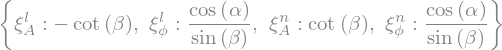

In [14]:
typeI_ξh 

### Form factor with one fermion in the loop.

#### AL one fermion 

In [15]:
from OneLoopLFVHD.data import ml

In [16]:
ma,mb = symbols('m_a,m_b',positive=True)
valores_h ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}

cambios_hab = lambda a,b:{lfvhd.ma:valores_h[mh],lfvhd.mi:ml[a],lfvhd.mj:ml[b]}


Ubi, Ucai,mni = symbols('U_{bi}, {{U_{ai}^*}},m_{n_i}')
UnuOne = {mn[i]:mni,Uν[b,i]:Ubi,Uνc[a,i]:Ucai}

# from Unu_seesaw_2HDM import diagonalizationMnu
# diagonalizationMnu1 = lambda m1,m6,tb,doblet: diagonalizationMnu(
#     m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6,tb,doblet)

from Unu_seesaw import diagonalizationMnu
# def diagonalizationMnu1(m1,m6):
#     mnk,U=diagonalizationMnu(m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6)
#     mn3,mn2,mn1,mn4,mn5,mn6 = mnk[0],mnk[1],mnk[2],mnk[3],mnk[4],mnk[5]
#     mn3 = -mn3
#     mn2 = -mn2
#     mn1 = -mn1
#     R = matrix([[-mn1/mn3,0,0,0,0,0],
#                [0,-1,0,0,0,0],
#                [0,0,-mn3/mn1,0,0,0],
#                [0,0,0,1,0,0],
#                [0,0,0,0,1,0],
#                [0,0,0,0,0,1]])
#     Mni = matrix([[-mn3,0,0,0,0,0],
#                  [0,-mn2,0,0,0,0],
#                   [0,0,-mn1,0,0,0],
#                  [0,0,0,mn4,0,0],
#                  [0,0,0,0,mn5,0],
#                  [0,0,0,0,0,mn6]])
#     Mn = R*Mni
#     Mnk = Mn[0,0],Mn[1,1],Mn[2,2],Mn[3,3],Mn[4,4],Mn[5,5]
#     return Mnk,R*U

diagonalizationMnu1 = lambda m1,m6: diagonalizationMnu(
    m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6)

In [17]:
# eig_sort(matrix([[1,1j],
#                 [1j,2]]),)

In [18]:
# for T in TrianglesOneFermion:
#     display(T.AL().subs(common_factor_h).subs(typeI_ξh).subs(lfvhd.D,4).subs(
#                     lfvhd.B12_0(mW,mW),0).subs(lfvhd.B12_0(mH,mW),0).subs(
#                     lfvhd.B12_0(mW,mH),0).subs(cambios_hab(2,3)).subs(valores_h
#                                                                      ).subs(UnuOne).atoms(Symbol))

In [19]:
def GIM_One(exp):
    from sympy import Add
    args = exp.expand().args
    func = exp.expand().func
    if isinstance(func,Add):
        X = Add(*[t for t in args if t.has(mni)]).simplify()
    else:
        X = exp
    #X1 = X.collect([mni],evaluate=False)
    return X#mni**2*X1[mni**2]

In [20]:
def sumOne(m6,Aab,aa,bb,mHpm_val, mA_val, alpha, beta, l5): 
    mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)
    Unu = UnuL
    Unu_dagger = UnuR
    AL = []
    for k in range(1,7):
        #print(mnk[k-1],Unu[b-1,k-1],conj(Unu[a-1,k-1]))
        #A = Aab(mnk[k-1],Unu[b-1,k-1],conj(Unu[a-1,k-1]),mHpm, mA, alpha, beta,l5)
        A = Aab(mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],mHpm_val, mA_val, alpha, beta,l5)
        #print('Ai = ',A)
        AL.append(A)
    return mp.fsum(AL)


In [21]:
from OneLoopLFVHD.data import replaceBs, pave_functions

In [22]:
# Aa = TrianglesOneFermion[0].AL().subs(common_factor_h).subs(typeI_ξh).subs(lfvhd.D,4).subs(
#                     lfvhd.B12_0(mW,mW),0).subs(lfvhd.B12_0(mH,mW),0).subs(
#                     lfvhd.B12_0(mW,mH),0).subs(cambios_hab(2,3)).subs(valores_h
#                                                                      ).subs(UnuOne)
# Aa.atoms(Symbol)

In [23]:
# A = lambdify([mni,Ubi,Ucai, mHpm, mA, α, β,λ5],replaceBs(Aa),
#                          modules=[pave_functions(valores_h[mh],2,3,lib='mpmath'),'mpmath'])

# A(1,2,3,4,5,6,7,8)

In [24]:
# mnk, UL,UR = diagonalizationMnu1(m1,mp.mpf('1000'))#0.003908
# nprint(mnk)

In [25]:
# nprint((m1,m2,m3))

In [26]:
# nprint(sumOne(mp.mpf('100'),A,2,3,mp.mpf('200.0'),mp.mpf('500'),mp.pi/2, mp.pi/1000, mp.mpf('0.1'),2))

In [27]:
mHpm_aux = symbols('mHpm',positive=True)
def numeric_sum_diagramsOne(a,b,mHpm_n, mA_n, alpha, beta, l5,quirality='L',
                            common_factor=common_factor_h,
                            type_2HDM=typeI_ξh,
                            valores=valores_h):
    
    FdiagOneFer = []
    i = 0
    #print('Inside numeric_sum_diagramsOne')
    for Set in [TrianglesOneFermion,Bubbles]:#TrianglesOneFermion,Bubbles
        for dia in Set:
            if quirality=='L':
                x = dia.AL().subs(common_factor).subs(type_2HDM).subs(lfvhd.D,4).subs(
                    lfvhd.B12_0(mW,mW),0).subs(lfvhd.B12_0(mHpm,mW),0).subs(
                    lfvhd.B12_0(mW,mHpm),0).subs(cambios_hab(a,b)).subs(valores).subs(UnuOne)
            elif quirality=='R':
                x = dia.AR().subs(common_factor).subs(type_2HDM).subs(lfvhd.D,4).subs(
                    lfvhd.B12_0(mW,mW),0).subs(lfvhd.B12_0(mHpm,mW),0).subs(
                    lfvhd.B12_0(mW,mHpm),0).subs(cambios_hab(a,b)).subs(valores).subs(UnuOne)
            else:
                raise ValueError('quirality must be L or R')

            f = lambdify([mni,Ubi,Ucai, mHpm_aux, mA, α, β,λ5],replaceBs(x).subs(mHpm,mHpm_aux),
                         modules=[pave_functions(valores_h[mh],a,b,lib='mpmath'),'mpmath'])
            #print(f'diagram i = {i}')
            #nprint(f(mpf('100'),0.1,0.2,mHpm_n, mA_n, alpha, beta, l5))
            #fsum = lambda m6:sumOne(m6,f,a,b)
            FdiagOneFer.append(f)
            i+=1
    def suma(m6):
        out = []
        xs = []
        #print('suma sobre i')
        for FF in FdiagOneFer:
            x = sumOne(m6,FF,a,b,mHpm_n, mA_n, alpha, beta, l5)
            #print(x)
            #m6,Aab,a,b,mHpm, mA, alpha, beta, l5,doblet
            out.append(x)
            xs.append(x)
        #print('suma sobre i terminada')
        return np.array(xs), mp.fsum(out)
    return suma

In [109]:
mHpm_val = mp.mpf('1000.0')
mA_val = mp.mpf('800.0')
tb = mp.mpf('0.1')
β_val = mp.atan(tb)
α_val = β_val - mp.pi/2.0
# Φ =2
# nprint((mHpm_val,mA_val,tb,β,Φ))

In [29]:
# nprint(numeric_sum_diagramsOne(2,3,mHpm_val, mA_val, mp.pi/2.0,β_val,mp.mpf('0.1'),Φ,quirality='L')(mp.mpf('1000'))[1])

**cambiar modelo o scalar**

In [110]:
def ALOneTot23(m6,mHpm_n=mHpm_val, mA_n=mA_val, alpha=α_val,beta=β_val, l5=mp.mpf('0.1')):
    return numeric_sum_diagramsOne(2,3,mHpm_n, mA_n, alpha,beta, l5,quirality='L',
                            common_factor=common_factor_h,
                            type_2HDM=typeI_ξh,
                            valores=valores_h)(m6)[1]

def AROneTot23(m6,mHpm_n=mHpm_val, mA_n=mA_val, alpha=α_val,beta=β_val, l5=mp.mpf('0.1')):
    return numeric_sum_diagramsOne(2,3,mHpm_n, mA_n, alpha,beta, l5,quirality='R',
                            common_factor=common_factor_h,
                            type_2HDM=typeI_ξh,
                            valores=valores_h)(m6)[1]


def ALOneTot13(m6,mHpm_n=mHpm_val, mA_n=mA_val, alpha=α_val,beta=β_val, l5=mp.mpf('0.1')):
    return numeric_sum_diagramsOne(1,3,mHpm_n, mA_n, alpha,beta, l5,quirality='L',
                            common_factor=common_factor_h,
                            type_2HDM=typeI_ξh,
                            valores=valores_h)(m6)[1]

def AROneTot13(m6,mHpm_n=mHpm_val, mA_n=mA_val, alpha=α_val,beta=β_val, l5=mp.mpf('0.1')):
    return numeric_sum_diagramsOne(1,3,mHpm_n, mA_n, alpha,beta, l5,quirality='R',
                            common_factor=common_factor_h,
                            type_2HDM=typeI_ξh,
                            valores=valores_h)(m6)[1]


def ALOneTot12(m6,mHpm_n=mHpm_val, mA_n=mA_val, alpha=α_val,beta=β_val, l5=mp.mpf('0.1')):
    return numeric_sum_diagramsOne(1,2,mHpm_n, mA_n, alpha,beta, l5,quirality='L',
                            common_factor=common_factor_h,
                            type_2HDM=typeI_ξh,
                            valores=valores_h)(m6)[1]

def AROneTot12(m6,mHpm_n=mHpm_val, mA_n=mA_val, alpha=α_val,beta=β_val, l5=mp.mpf('0.1')):
    return numeric_sum_diagramsOne(1,2,mHpm_n, mA_n, alpha,beta, l5,quirality='R',
                            common_factor=common_factor_h,
                            type_2HDM=typeI_ξh,
                            valores=valores_h)(m6)[1]

In [62]:
nprint(ALOneTot12(mp.mpf('100')))

(-1.13879e-22 + 4.07758e-103j)


In [111]:
n = 2
expmp = linspace(-1,15,n)
m6np = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [ ]:
%%time
YLOne23 = speedup_array(ALOneTot23,m6np)

YLOne13 = speedup_array(ALOneTot13,m6np)

YLOne12 = speedup_array(ALOneTot12,m6np)


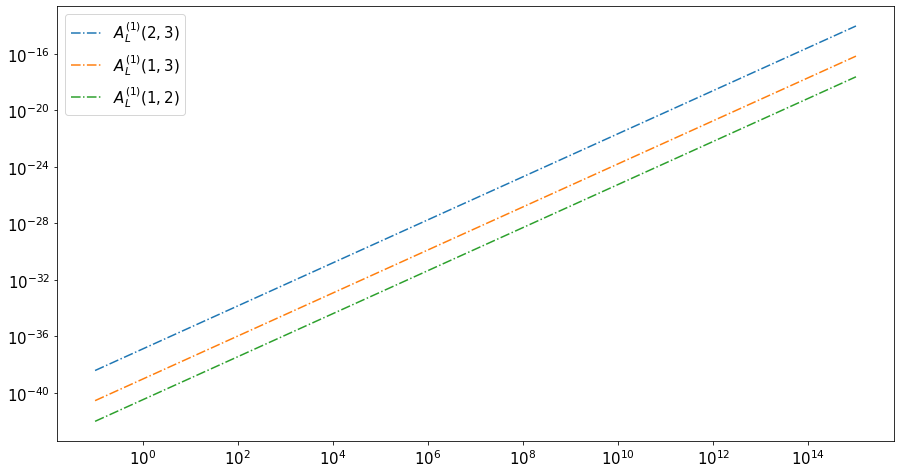

In [93]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(m6np),abs(YLOne23)**2,'-.',label='$A_L^{(1)}(2,3)$')
#plt.loglog(np.real(m6np),abs(YLOne32)**2,'--',label='$A_L^{(1)}(3,2)$')

plt.loglog(np.real(m6np),abs(YLOne13)**2,'-.',label='$A_L^{(1)}(1,3)$')
#plt.loglog(np.real(m6np),abs(YLOne31)**2,'--',label='$A_L^{(1)}(3,1)$')

plt.loglog(np.real(m6np),abs(YLOne12)**2,'-.',label='$A_L^{(1)}(1,2)$')
#plt.loglog(np.real(m6np),abs(YLOne21)**2,'--',label='$A_L^{(1)}(2,1)$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15)

### Form factor with two fermion in the loop.

In [112]:
mnj = symbols('m_{n_j}',positive=True)
Cijs, Cijcs, Ubj = symbols('C_{ij}, {{C_{ij}^*}},U_{bj}')
UnuTwo = {mn[i]:mni,mn[jj]:mnj,C[i,jj]:Cijs, Cc[i,jj]:Cijcs, Uν[b,jj]:Ubj, Uνc[a,i]:Ucai}
UnuTwo

In [113]:
#TrianglesTwoFermion[0].AL().subs(lfvhd.D,4).subs(cambios_hab(2,3)).subs(valores_h).subs(UnuTwo)

**Cambiar modelo o scalar**

In [114]:
def FFsymbolic(k,a,b,quirality='L',common_factor=common_factor_h,type_2HDM=typeI_ξh,valores=valores_h):
    if quirality=='L':
        FF = TrianglesTwoFermion[k].AL()
    elif quirality=='R':
        FF = TrianglesTwoFermion[k].AR()
    else:
        raise ValueError('quirality must be L or R')
    return FF.subs(common_factor).subs(type_2HDM).subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuTwo)
#fsR = lambda k,a,b:TrianglesTwoFermion[k].AR().subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores_h).subs(UnuTwo)

In [33]:
#FFsymbolic(2,2,3).atoms(Symbol)

**Cambiar modelo o scalar**

In [115]:
FFmpL = lambda k,a,b:lambdify([mni,mnj,Ubj,Ucai,Cijs,Cijcs,mHpm_aux,α,β],
                              replaceBs(FFsymbolic(k,a,b,quirality='L'
                            ,common_factor=common_factor_h,
                            type_2HDM=typeI_ξh#########
                            ,valores=valores_h).subs(mHpm,mHpm_aux)),
                     modules=[pave_functions(valores_h[mh],a,b,lib='mpmath'),'mpmath'] )

FFmpR = lambda k,a,b:lambdify([mni,mnj,Ubj,Ucai,Cijs,Cijcs,mHpm_aux,α,β],
                              replaceBs(FFsymbolic(k,a,b,quirality='R'
                            ,common_factor=common_factor_h,
                            type_2HDM=typeI_ξh#########
                            ,valores=valores_h).subs(mHpm,mHpm_aux)),
                     modules=[pave_functions(valores_h[mh],a,b,lib='mpmath'),'mpmath'] )

In [35]:
#nprint(FFmpL(0,2,3)(1,2,3,4,5,6,7,8,9))

In [116]:
def sumatwo(mm6,k,a,b,mHpm_n,alpha,beta,quirality='L'):
    xs = []
    if quirality=='L':
        g = FFmpL(k,a,b)
    elif quirality=='R':
        g = FFmpR(k,a,b)
    else:
        raise ValueError('quirality must be L or R')
        
    mnk,UnuL, UnuR = diagonalizationMnu1(m1,mm6)
    Unu = UnuL
    Unu_dagger = UnuR
    #Cij = lambda i,j: mp.fsum([Unu[c,i]*conj(Unu[c,j]) for c in range(3)])
    Cij = lambda i,j: mp.fsum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])
    for p in range(1,7):
        for q in range(1,7):
            #x = g(mnk[p-1],mnk[q-1],Unu[b-1,q-1],conj(Unu[a-1,p-1]),Cij(p-1,q-1),conj(Cij(p-1,q-1)),mHpm_n,alpha,beta)
            x = g(mnk[p-1],mnk[q-1],Unu[b-1,q-1],Unu_dagger[p-1,a-1],Cij(p-1,q-1),conj(Cij(p-1,q-1)),mHpm_n,alpha,beta)
            xs.append(x)
            #print(f'i = {p} and j = {q}')
            #print(f'|f| = {x}')
    return mp.fsum(xs)

In [117]:
def totaltwo(m6,a,b,mHpm_n,alpha,beta,quirality='L'):
    #print('Inside totaltwo')
    #print('doble suma sobre i j')
    out = (sumatwo(m6,0,a,b,mHpm_n,alpha,beta,quirality) + sumatwo(m6,1,a,b,mHpm_n,alpha,beta,quirality)
           + sumatwo(m6,2,a,b,mHpm_n,alpha,beta,quirality))
    #print('doble suma sobre i j terminada')
    return out

In [118]:
def ALTwoTot23(m6):
    return totaltwo(m6,2,3,mHpm_n=mHpm_val,alpha=α_val,beta=β_val,quirality='L')
def ARTwoTot23(m6): 
    return totaltwo(m6,2,3,mHpm_n=mHpm_val,alpha=α_val,beta=β_val,quirality='R')

#def ALTwoTot32(m6): 
#return totaltwo(m6,3,2,mHpm_n=mHpm_val,alpha=α_val,beta=β_val,quirality='L')
#def ARTwoTot32(m6): 
#return totaltwo(m6,3,2,mHpm_n=mHpm_val,alpha=α_val,beta=β_val,quirality='R')

def ALTwoTot13(m6): 
    return totaltwo(m6,1,3,mHpm_n=mHpm_val,alpha=α_val,beta=β_val,quirality='L')
def ARTwoTot13(m6): 
    return totaltwo(m6,1,3,mHpm_n=mHpm_val,alpha=α_val,beta=β_val,quirality='R')

#def ALTwoTot31(m6): 
#return totaltwo(m6,3,1,mHpm_n=mHpm_val,alpha=α_val,beta=β_val,quirality='L')
#def ARTwoTot31(m6): 
#return totaltwo(m6,3,1,mHpm_n=mHpm_val,alpha=α_val,beta=β_val,quirality='R')
def ALTwoTot12(m6): 
    return totaltwo(m6,1,2,mHpm_n=mHpm_val,alpha=α_val,beta=β_val,quirality='L')
def ARTwoTot12(m6): 
    return totaltwo(m6,1,2,mHpm_n=mHpm_val,alpha=α_val,beta=β_val,quirality='R')

#def ALTwoTot21(m6): 
#return totaltwo(m6,2,1,mHpm_n=mHpm_val,alpha=α_val,beta=β_val,quirality='L')
#def ARTwoTot21(m6): 
#return totaltwo(m6,2,1,mHpm_n=mHpm_val,alpha=α_val,beta=β_val,quirality='R')

In [90]:
nprint((abs(ALTwoTot12(m6np[0]))))

5.35544e-27


## Total Form Factors

In [119]:
#a = 2, b = 3
def ALtot23(m6):
    return  ALOneTot23(m6) + ALTwoTot23(m6)
def ARtot23(m6):
    return  AROneTot23(m6) + ARTwoTot23(m6)

#a = 3, b = 2
# def ALtot32(m6):
#     return  ALOneTot32(m6) + ALTwoTot32(m6)
# def ARtot32(m6):
#     return  AROneTot32(m6) + ARTwoTot32(m6)

#a = 1, b = 3
def ALtot13(m6):
    return  ALOneTot13(m6) + ALTwoTot13(m6)
def ARtot13(m6):
    return  AROneTot13(m6) + ARTwoTot13(m6)

#a = 3, b = 1
# def ALtot31(m6):
#     return  ALOneTot31(m6) + ALTwoTot31(m6)
# def ARtot31(m6):
#     return  AROneTot31(m6) + ARTwoTot31(m6)

#a = 1, b = 2
def ALtot12(m6):
    return  ALOneTot12(m6) + ALTwoTot12(m6)
def ARtot12(m6):
    return  AROneTot12(m6) + ARTwoTot12(m6)

#a = 2, b = 1
# def ALtot21(m6):
#     return  ALOneTot21(m6) + ALTwoTot21(m6)
# def ARtot21(m6):
#     return  AROneTot21(m6) + ARTwoTot21(m6)

In [46]:
%%time
nprint(ALtot12(m1))
nprint(ARtot12(m1))

(-2.22834e-33 - 2.33866e-33j)
(-4.45745e-31 - 4.84817e-31j)
CPU times: user 1min 21s, sys: 44.4 ms, total: 1min 21s
Wall time: 1min 21s


## Width decay of $h \to e_a e_b$

In [120]:
from OneLoopLFVHD import Γhlilj 
# def Γhlilj(ML,MR,ma=mpf('125.18'),mi=ml[2],mj=ml[3]):
#     r = 1/(8 *pi* ma)*sqrt((1-((mi**2+mj**2)/ma)**2)*(1-((mi**2-mj**2)/ma)**2))*((ma**2 - mi**2 - mj**2)*(abs(ML)**2 + abs(MR)**2)-4*mi*mj*re(ML*conj(MR)))
#     return r

In [121]:
def Γhl2l3(m6):
    return Γhlilj(ALtot23(m6),ARtot23(m6),valores_h[mh],ml[2],ml[3])
# def Γhl3l2(m6):
#     return Γhlilj(ALtot32(m6),ARtot32(m6),valores_h[mh],ml[3],ml[2])

def Γhl1l3(m6):
    return Γhlilj(ALtot13(m6),ARtot13(m6),valores_h[mh],ml[1],ml[3])
# def Γhl3l1(m6):
#     return Γhlilj(ALtot31(m6),ARtot31(m6),valores_h[mh],ml[3],ml[1])

def Γhl1l2(m6):
    return Γhlilj(ALtot12(m6),ARtot12(m6),valores_h[mh],ml[1],ml[2])
# def Γhl2l1(m6):
#     return Γhlilj(ALtot21(m6),ARtot21(m6),valores_h[mh],ml[2],ml[1])

In [122]:
n = 200#800
expmp = linspace(-1,15,n)
m6np = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [234]:
#nprint(Γhl1l3(m6np[-1]))
#nprint((ALtot12(mp.mpf('1e3')),ARtot12(mp.mpf('1e3')),valores_h[mh],ml[1],ml[2]))

In [123]:
%%time
YW23 = speedup_array(Γhl2l3,m6np)
#YW32 = speedup_array(Γhl3l2,m6np)

YW13 = speedup_array(Γhl1l3,m6np)
#YW31 = speedup_array(Γhl3l1,m6np)

YW12 = speedup_array(Γhl1l2,m6np)

#YW21 = speedup_array(Γhl2l1,m6np)

Process ForkPoolWorker-31:
Process ForkPoolWorker-32:
Process ForkPoolWorker-29:
Process ForkPoolWorker-30:
Traceback (most recent call last):
  File "/opt/JupyterLab/resources/jlab_server/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/JupyterLab/resources/jlab_server/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)


KeyboardInterrupt: 

  File "/opt/JupyterLab/resources/jlab_server/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/opt/JupyterLab/resources/jlab_server/lib/python3.8/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
Traceback (most recent call last):
  File "/tmp/ipykernel_49079/3853730344.py", line 2, in Γhl2l3
    return Γhlilj(ALtot23(m6),ARtot23(m6),valores_h[mh],ml[2],ml[3])
Traceback (most recent call last):
Traceback (most recent call last):
  File "/tmp/ipykernel_49079/1983058545.py", line 5, in ARtot23
    return  AROneTot23(m6) + ARTwoTot23(m6)
  File "/opt/JupyterLab/resources/jlab_server/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/JupyterLab/resources/jlab_server/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/tmp/ipykernel_49079/2383937876.py", line 4, in ARTwoTot23
    return totaltwo(m6,2,3,mHpm_n=mHpm_val,alpha=α_

In [91]:
Wtot = YW23 + YW13 + YW12 + 0.0032# + YW32 + YW31 + YW21

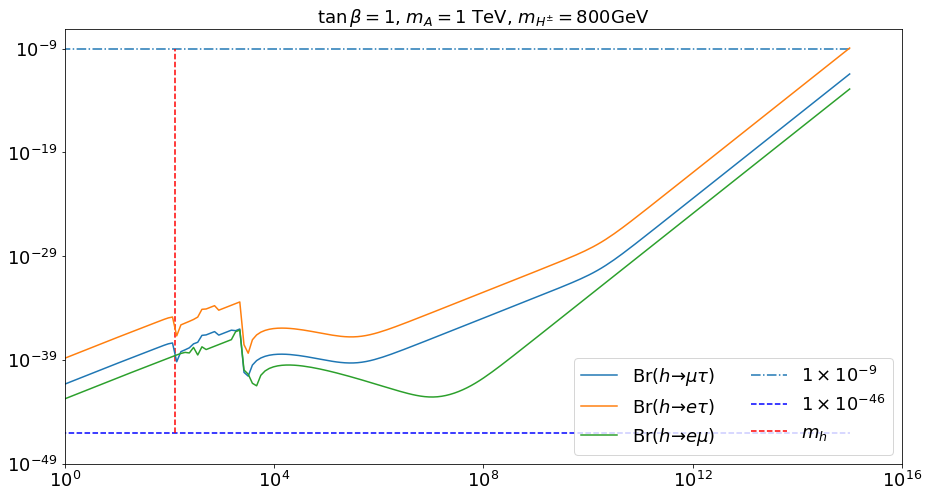

In [104]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(m6np),(YW23 #+ YW32
                         )/Wtot,label=r'Br($h \to \mu \tau$)')
plt.loglog(np.real(m6np),(YW13 #+ YW31
                         )/Wtot,label=r'Br($h \to e \tau$)')
plt.loglog(np.real(m6np),(YW12 #+ YW21
                         )/Wtot,label=r'Br($h \to e \mu$)')

#xx = ((YW23 + YW32)/Wtot)[-1]
plt.hlines(1e-9,0.1,1e15,linestyles='-.',label=r'$1\times 10^{-9}$')
plt.hlines(1e-46,0.1,1e15,linestyles='--',color='b',label=r'$1\times 10^{-46}$')

plt.vlines(125.1,1e-46,1e-9,linestyles='--',color='r',label=r'$m_h$')
#plt.vlines(800**2 + 1000**2 + 125.1**2,1e-59,1e-30,linestyles='--',color='r',label=r'$m_{H^{\pm}}$')

plt.xlim(1e3,1e15)
plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=18)
plt.xticks([1,1e4,1e8,1e12,1e16],fontsize=18)
plt.title(r'$\tan{\beta}=1$, $m_A=1$ TeV, $m_{H^{\pm}}=800$GeV',fontsize=18)
plt.legend(fontsize=18,frameon=True,ncol=2,loc=4)
plt.savefig('2HDM-tipoI-alignment-caso-1_ma800-mhpm1000.png',dpi=100)

In [105]:
import pandas as pd

In [106]:
df = pd.DataFrame({'m6':m6np,
                   'Whl2l3':YW23,
                   #'Whl3l2':YW32,
                   'Whl1l3':YW13,
                   #'Whl3l1':YW31,
                   'Whl1l2':YW12})
                   #'Whl2l1':YW21})

In [ ]:
#type I alignment caso 1 mHpm >mA
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# tb = mp.mpf('1.0')
# β_val = mp.atan(tb)
# α_val = β_val -mp.pi/2.0
# Φ = 2

#type I allignment caso 1 mA < mHpm
# mHpm_val = mp.mpf('800.0')
# mA_val = mp.mpf('1000.0')
# tb = mp.mpf('1.0')
# β_val = mp.atan(tb)
# α_val = β_val -mp.pi/2.0
# Φ = 2



In [107]:
df.to_csv('TypeI_alignment_caso1_mA1000_mHpm800.txt',sep='\t')

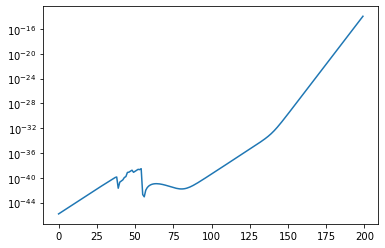

In [108]:
plt.semilogy(np.array(list(map(mpf,df['Whl2l3']))))